# Research assignment 3

John Adeleke

Educational attainment and Health Insurance Coverage of Women in Urban and Rural areas of Nigeria

02/25/2024

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data.
    
    A: For this assignment, my dependent variable is health inurance coverage. My dependent variable is a binary variable of YES or NO. It represents whether a respondent (woman) is covered by health insurance or not. 
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
    B: My independent variable is Level of education. In this dataset, Level of education is ordinal. It is ordinal because it shows that one person is higher in educational attainment than another. People with higher education may have better understanding of the health system when compare to those with lower education. I am interested in this variable because of my quest to understand how level of education influences whether a woman is covered by health insurance or not. 

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
    Age and type of place of residence are the control variables. Age is interval-ratio and type of place of residence is nominal. I am using age as a control variable to test for spurious relationship. Even though it appears that women with higher education may have health insurance but may not be the case if age is controlled for because women with higher education are mostly going to be older. Type of place of residence is also controlled for because women in urban areas are likely to receive more education than their rural counterparts which may also have impact on whether they have health insurance or not because urban areas in Nigeria tends to have better healthcare system and infrastructure, thereby creating an interacting relationship. 


    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
   
   HYPOTHESES
   
    H1. I hypothesize that women with higher levels of educational are more likely to be covered by health insurance in Nigeria.
    
    H2. I hypothesize that women with higher levels of educational attainment are more likely to be covered by health insurance in Nigeria if they are older.
    
    H3. I hypothesize that women with higer level of educational attainment are more likely to be covered by health insurance in Nigeria if they are older, controlling for whether they live in urban or rural areas. 

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
cd "/Users/johnadeleke/Desktop/Stats2/soc211_assignment" 

/Users/johnadeleke/Desktop/Stats2/soc211_assignment


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Log for Research Assignment3.log", replace

(file /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Research
    Assignment3.log not found)
-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Resear
> ch Assignment3.log
  log type:  text
 opened on:  26 Feb 2024, 21:57:11


In [4]:
set maxvar 120000

In [5]:
use /Users/johnadeleke/Desktop/Stats2/soc211_assignment/NGIR7BDT/NGIR7BFL.DTA

In [6]:
use v106 v013 v025 v481 using "NGIR7BDT/NGIR7BFL.DTA", clear

In [7]:
describe v106 v013 v025 v481


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v106            byte    %8.0g      V106       highest educational level
v013            byte    %8.0g      V013       age in 5-year groups
v025            byte    %8.0g      V025       type of place of residence
v481            byte    %8.0g      V481       covered by health insurance


In [8]:
codebook v106 v013 v025 v481


-------------------------------------------------------------------------------
v106                                                  highest educational level
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V106

                 Range: [0,3]                         Units: 1
         Unique values: 4                         Missing .: 0/41,821

            Tabulation: Freq.   Numeric  Label
                       14,398         0  no education
                        6,383         1  primary
                       16,698         2  secondary
                        4,342         3  higher

-------------------------------------------------------------------------------
v013                                                       age in 5-year groups
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show
    
    B. The scatterplots show the bivariate relationship between health insurance coverage and the independent variables. There appears to be a slight positive association between levels of education and health insurance coverage. The fitted lines for age and type of place of residence are relatively flat which show that there may be no association between age and health insurance coverage, and type of place of residence and health insurance coverage. 

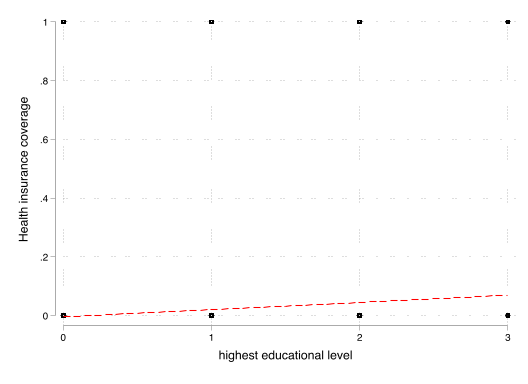

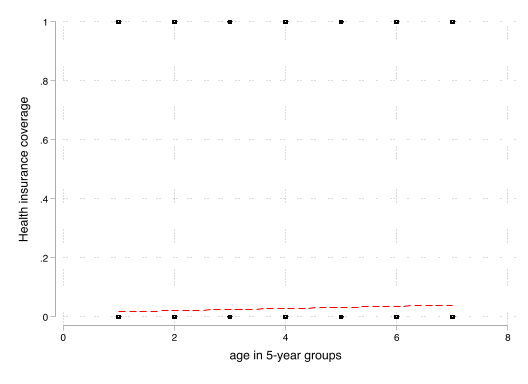

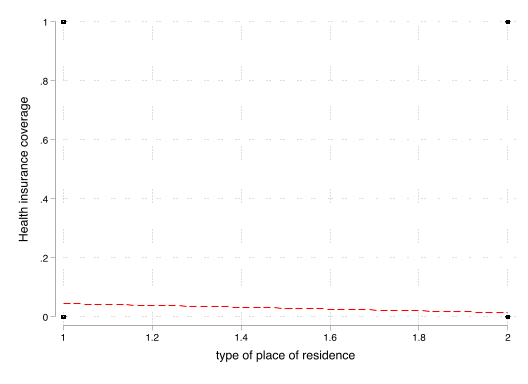

In [9]:
foreach x in v106 v013 v025 {
quietly  graph twoway (scatter v481 `x') (lfit v481 `x', color(red)), ///
    name(`x', replace) legend(off) ytitle(Health insurance coverage) scheme(plotplainblind)
}

In [10]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [11]:
%set graph_height = 8


graph size was (11, 4in), is now (11, 8).


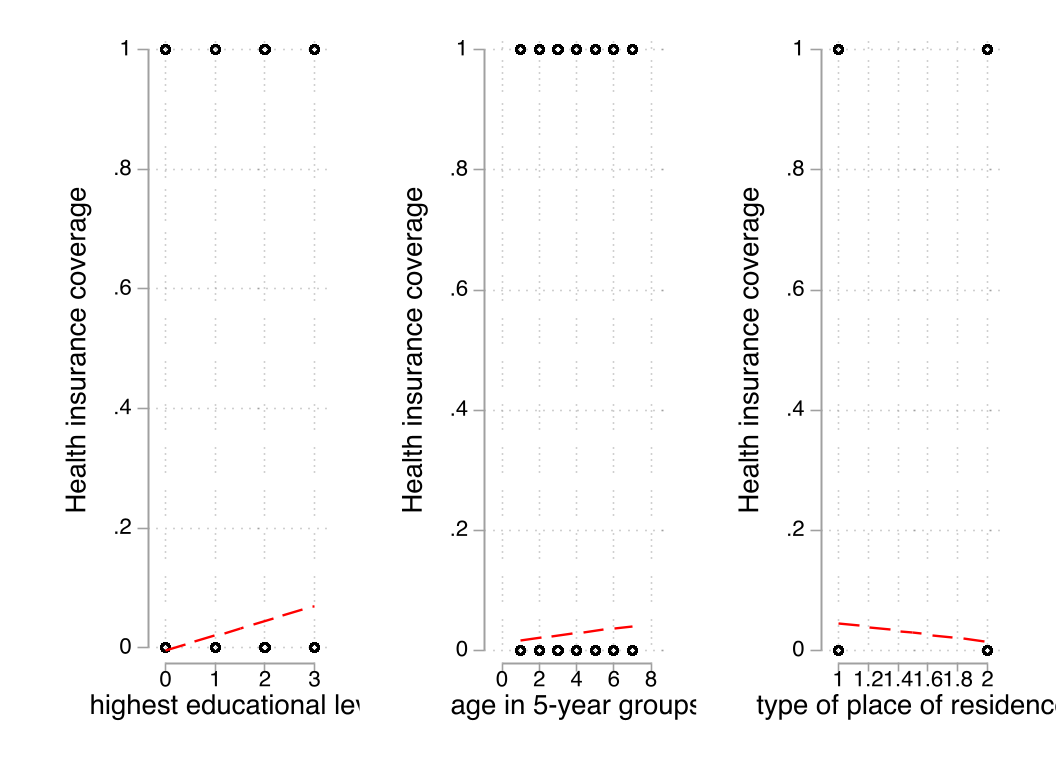

In [12]:
graph combine v106 v013 v025, col(3) scheme(plotplainblind) xsize(4)

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.
    
    B. As indicated in the scatterplots and this correlation matrix, there is a weak/negligible positive correlation (0.1595) between levels of education and health insurance coverage, and it appears there is negligible positive correlation ( 0.0449) between health insurance coverage and age, and negligible negative correlation (-0.0940) between health insurance coverage and type of place of residence. There is a moderate negative relationship (-0.3653) between levels of education and type of place of residence which shows that women in urban areas have higher education when compare with women in rural areas of Nigeria.  

In [13]:
pwcorr v481 v106 v013 v025


             |     v481     v106     v013     v025
-------------+------------------------------------
        v481 |   1.0000 
        v106 |   0.1595   1.0000 
        v013 |   0.0449  -0.1381   1.0000 
        v025 |  -0.0940  -0.3653  -0.0160   1.0000 


## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    A.  Model 1: H1
        Model 2: H2
        Model 3: H3
    
    B. Which variables are included in each model
    
    B. Model 1: Health insurance coverage and educational attainment
        Model 2: Health insurance coverage and educational attainment while controlling for age
        Model 3: Health insurance coverage and educational attainment while controlling for age and type of place of residence
    
    C. How/why adding particular variables to subsequent models will test for spurious or intervening relationships
    
    C. Model 1 tests the main hypothesis I am interested in which is how women's levels of education shape health insurance coverage. Model 2 includes age as a demographic factor of interest, which can be strongly associated with levels of education. Model 3 includes age and type of place of residence as control variables, even though I am not interested in these variables, I include them to see if my model 1 is strong. 

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

Model 1

$\hat{Y} = \alpha + \beta_e \cdot x_e $ 

$x_e$ is educational attainmenent

Model 2

$\hat{Y} = \alpha + \beta_e \cdot x_e + \beta_a \cdot x_a $ 

$x_e$ is educational attainmenent 

$x_a$ is age 


Model 3

$\hat{Y} = \alpha + \beta_e \cdot x_e + \beta_a \cdot x_a + \beta_t \cdot x_t$ 

$x_e$ is educational attainmenent 

$x_a$ is age 

$x_t$ is type of place of residence

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook and as an RTF file

In [14]:
*Model 1
quietly eststo: reg v481 v106

*Model 2
quietly eststo: reg v481 v106 v013

*Model 3
quietly eststo: reg v481 v106 v013 v025

In [15]:
*Run one esttab to show the output within Jupyter Notebook

esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (v106 "Education" v013 "Age" v025 "Residence") noconstant


------------------------------------------------------------
                      (1)             (2)             (3)   
                  Model 1         Model 2         Model 3   
                     b/se            b/se            b/se   
------------------------------------------------------------
Education           0.025***        0.026***        0.024***
                  (0.001)         (0.001)         (0.001)   
Age                                 0.006***        0.005***
                                  (0.000)         (0.000)   
Residence                                          -0.012***
                                                  (0.002)   
------------------------------------------------------------
R-Squared           0.025           0.030           0.031   
N               41821.000       41821.000       41821.000   
------------------------------------------------------------


In [16]:
*Run another esttab to store the table as an RTF file now

quietly esttab using researchassignment3_tables.rtf, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (v106 "Education" v013 "Age" v025 "Residence") noconstant rtf replace

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    A. Women with higher levels of education are more likely to be covered by health insurance. From the output above, education is statistically significant for health insurance coverage across all models (p < 0.001). This shows that the finding hold true even when age and place of residence are included in the analysis. Therefore, the relationship between educational attainment and health insurance coverage is not spurious. 
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
    B. Model 2 shows that both levels of education and age are statistically significant for health insurance coverage (p < 0.001). This provides some evidence that age, separate from levels of education, holds some influence over health insurance coverage. Model 3 shows that levels of education, age and type of residence are all statistically significant. This shows that the relationship between levels of education and health insurance coverage is statistically significant even when age and type of place of residence are control for. Since urban represents one (1) and rural represents two (2), therefore, women in urban areas with higher education across age groups are more likely to have health insurance coverage in Nigeria. Therefore, we can accept the three hypotheses.  

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
    
    C. Although all the hypotheses tested in this analysis is true, it would be interesting to see employment status influence health insurance coverage. This is because health insurance coverage in Nigeria is mostly provided by employers, especially in the formal sector. For an economy that is largely informal, it is not surprising to see that less than three (3) percent of women in Nigeria has some form of health insurance coverage. 

In [17]:
log close

      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Stats2/soc211_assignment/Log for Resear
> ch Assignment3.log
  log type:  text
 closed on:  26 Feb 2024, 21:57:29
-------------------------------------------------------------------------------
